# House Pricing Prediction - a Kaggle Competition

In this project, we will predict house prices in a Kaggle competition using the dataset of residential homes in Ames, Iowa. There are 79 variables describing most of the aspects of the homes and we will try to utilize all these information to make a better prediction.

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## 1. Importing Libraries

Let's start with importing the libraries we will need in this project. 

In [1]:
## Importing libraries

import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.linear_model import LassoCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Reading and Understanding Data

In this section, we will read the data into notebook and have some fundamental perspective about the data.

### 2.1 Reading Data

We have 2 separate files to use. First file is the main data we will train our model with. Second file is the data we will test our model on.

In [2]:
## Reading the training data using 'Id' column as index
train_data = pd.read_csv('train.csv',index_col='Id')

## Reading the test data using 'Id' column as index
test_data = pd.read_csv('test.csv',index_col='Id')

### 2.2 Understanding Data

Let's have a quick look at the data to overview the size, the columns and a concise summary.

In [3]:
## First 5 rows of Train data
print("Train Data Overview:")
train_data.head()

Train Data Overview:


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
## First 5 rows of Test data
print("Test Data Overview:")
test_data.head()

Test Data Overview:


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
## Size of Train data and Test data
print("Train Data Size (Rows, Columns):")
print(train_data.shape, )
print("\nTest Data Size (Rows, Columns):")
print(test_data.shape, )

Train Data Size (Rows, Columns):
(1460, 80)

Test Data Size (Rows, Columns):
(1459, 79)


In [6]:
## Concise summary of Train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
## Concise summary of Test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

### 2.3 Missing Values

It is important to check if there are any missing values in the dataset. 

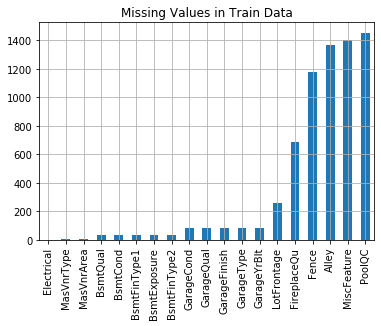

In [8]:
## Missing values in Train data
missing = train_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(title='Missing Values in Train Data', grid=1)

## 3. Data Visualization

Visualized data helps a lot to improve understanding of the data. We will produce figures to display the distribution of data in every column, as well as univariate and bivariate analysis of data.

### 3.1 Columns

We will start by identifying columns with type of the values they have: numerical or categorical.
This step will be the base of our approach while modelling the data.

In [9]:
## Identifying numerical features by excluding the columns having dtype as 'object' and dropping 'SalePrice' column
numerical_features = train_data.select_dtypes(exclude=['object']).drop(['SalePrice'], axis=1).copy()
print(numerical_features.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


In [10]:
## Identifying categorical features by including the columns having dtype as 'object'
categorical_features = train_data.select_dtypes(include=['object']).copy()
print(categorical_features.columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


### 3.2 Distribution of Data

Let's see the distribution of data in every numerical feature.

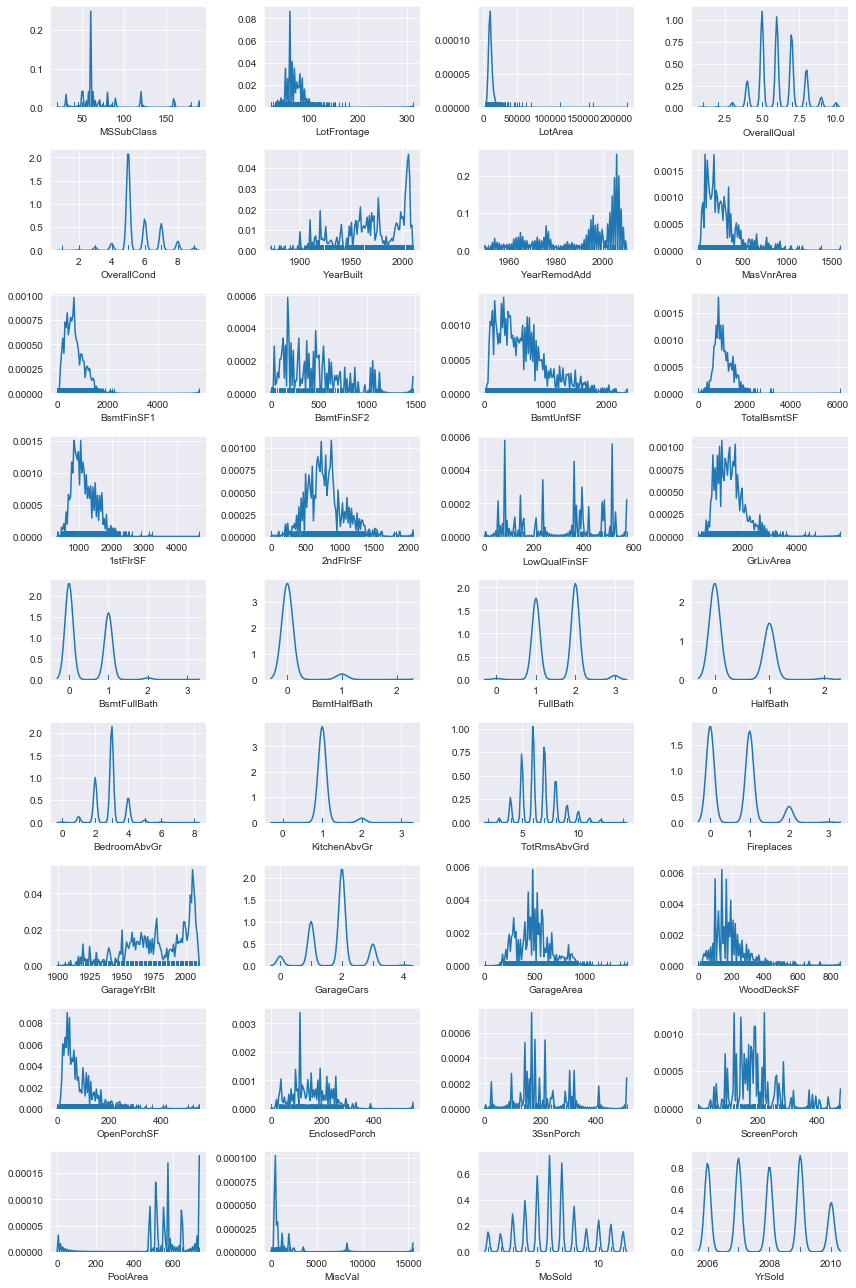

In [11]:
fig = plt.figure(figsize=(12,18))
sns.set_style("darkgrid")
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(numerical_features.iloc[:,i].dropna(), rug=True, hist=False, kde_kws={'bw':0.1})
    plt.xlabel(numerical_features.columns[i])
plt.tight_layout()
plt.show()

### 3.3 Univariate Analysis

First we will start with single variable analysis. We will summarize and find patterns within a single column.

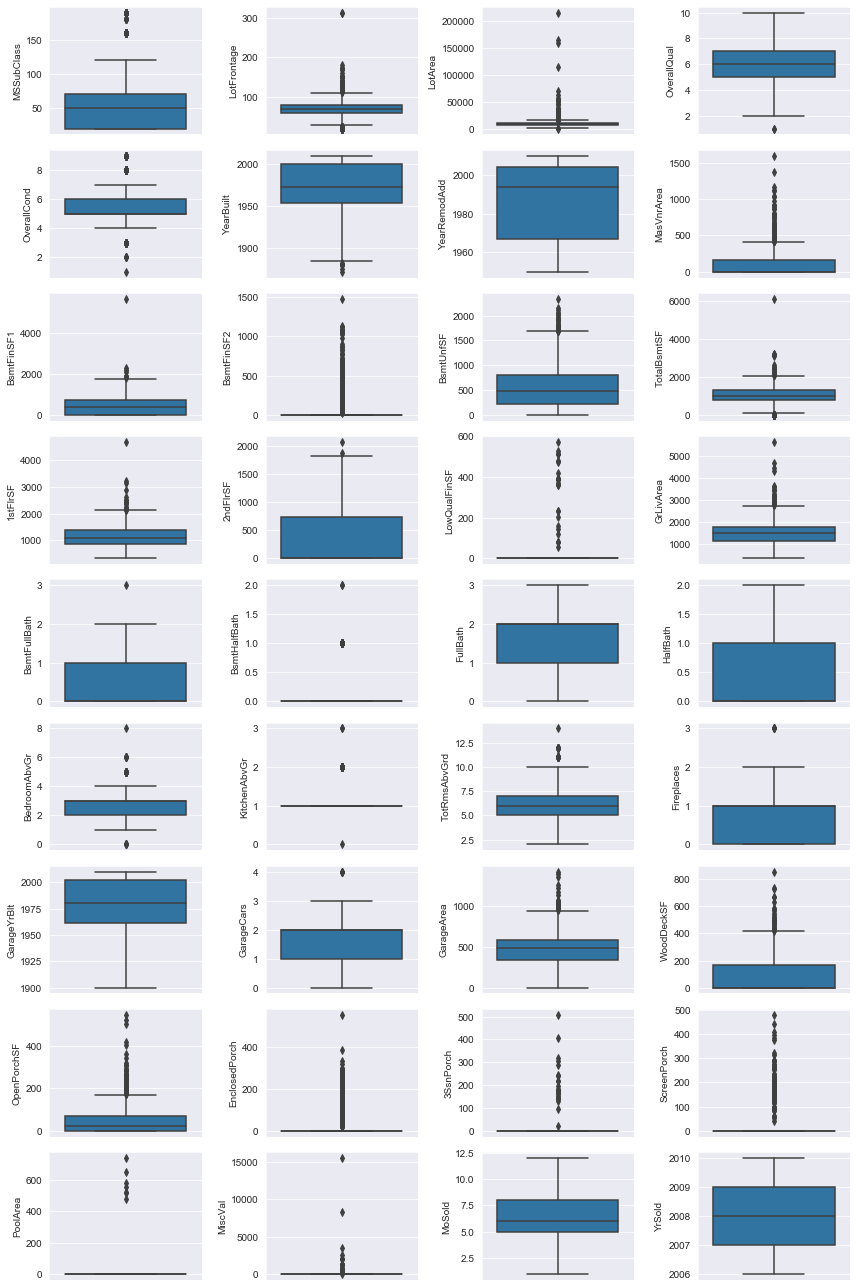

In [12]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

### 3.4 Bivariate Analysis

Next, we will expand the analysis by considering the relationship of every numerical feature with the house price.

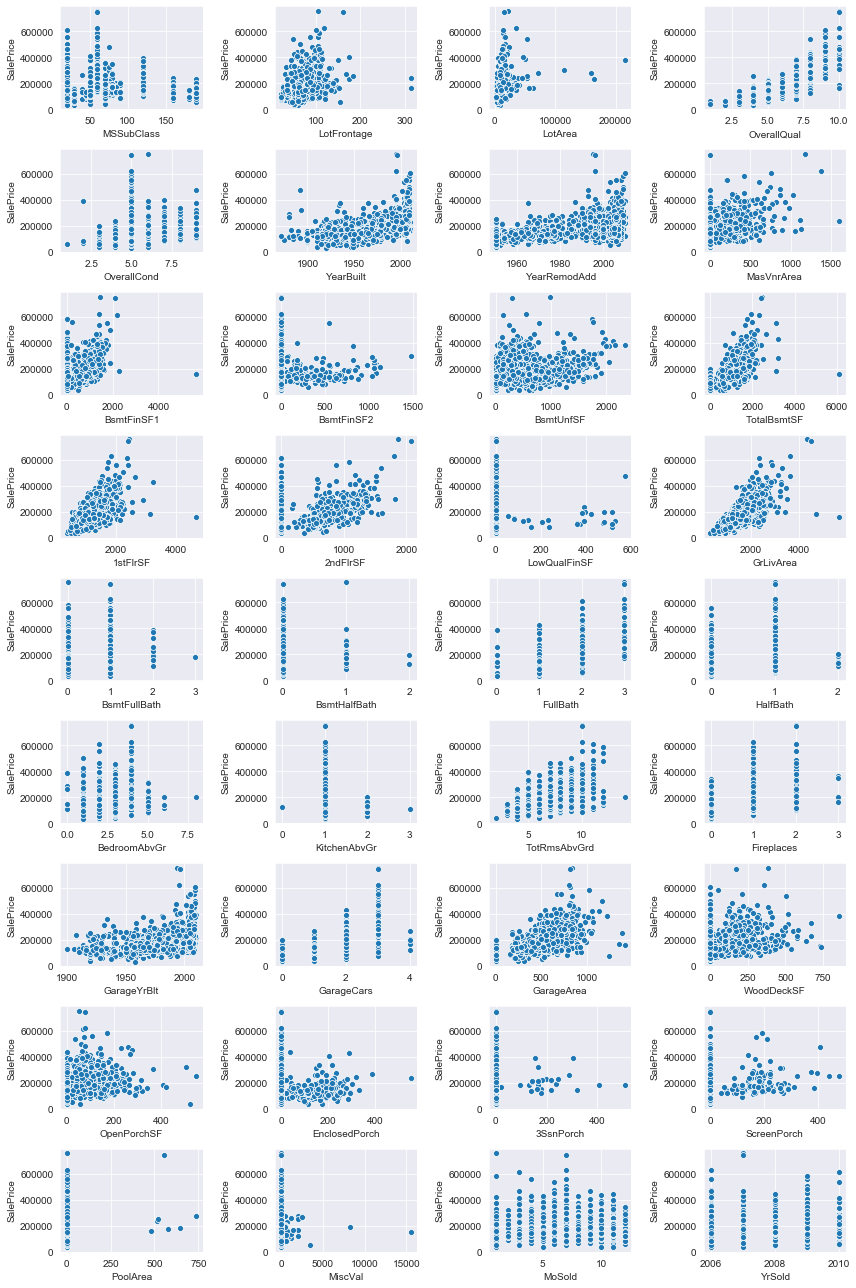

In [13]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.scatterplot(numerical_features.iloc[:, i],train_data['SalePrice'])
plt.tight_layout()
plt.show()

In [53]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 1 to 1460
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1449 non-null   int64  
 1   MSZoning       1449 non-null   object 
 2   LotFrontage    1449 non-null   float64
 3   LotArea        1449 non-null   int64  
 4   Street         1449 non-null   object 
 5   LotShape       1449 non-null   object 
 6   LandContour    1449 non-null   object 
 7   Utilities      1449 non-null   object 
 8   LotConfig      1449 non-null   object 
 9   LandSlope      1449 non-null   object 
 10  Neighborhood   1449 non-null   object 
 11  Condition1     1449 non-null   object 
 12  Condition2     1449 non-null   object 
 13  BldgType       1449 non-null   object 
 14  HouseStyle     1449 non-null   object 
 15  OverallQual    1449 non-null   int64  
 16  OverallCond    1449 non-null   int64  
 17  YearBuilt      1449 non-null   int64  
 18  YearRemo

In [54]:
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPor

## 4. Data Processing

In this section we will identify the outliers in the data, remove certain highly correlated features and fill missing values in numerical and categorical features appropriately.

- 4.1 Outliers
- 4.2 Removing Certain Features
- 4.3 Filling Numerical Missing Values
- 4.4 Filling Categorical Missing Values

### 4.1 Outliers

According to the plots above, these are the features which appear to have outliers:

- LotFrontage
- LotArea
- MasVnrArea
- BsmtFinSF1
- TotalBsmtSF
- 1stFlrSF
- EnclosedPorch
- MiscVal

Let's take a closer look at these features.

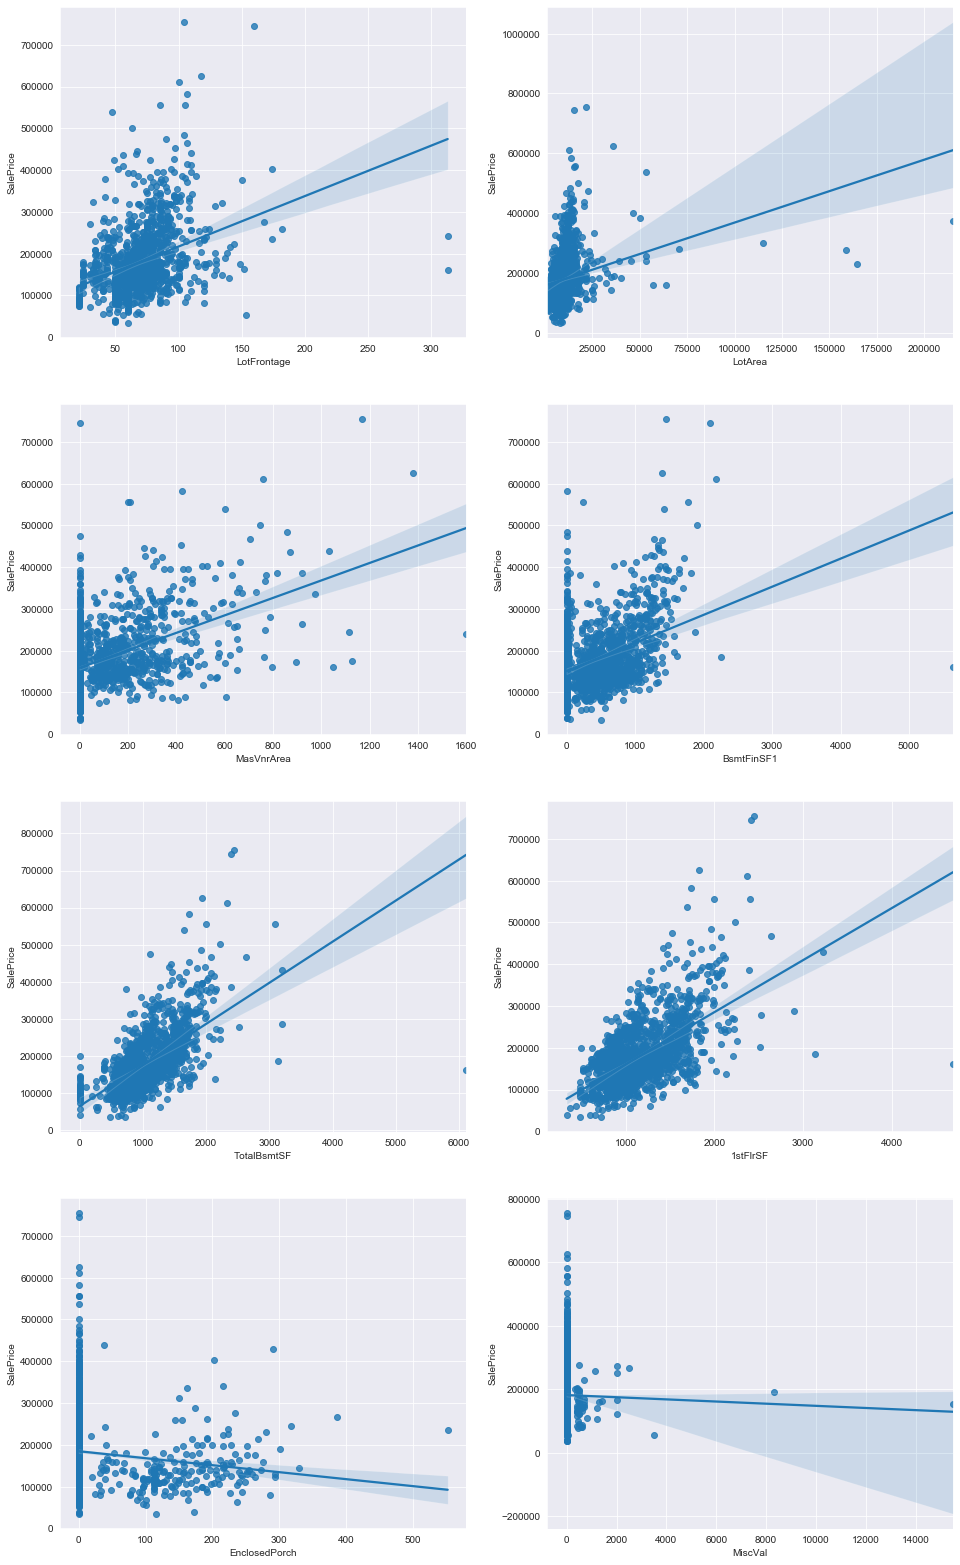

In [14]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(16,28)
_ = sns.regplot(train_data['LotFrontage'], train_data['SalePrice'], ax=ax1)
_ = sns.regplot(train_data['LotArea'], train_data['SalePrice'], ax=ax2)
_ = sns.regplot(train_data['MasVnrArea'], train_data['SalePrice'], ax=ax3)
_ = sns.regplot(train_data['BsmtFinSF1'], train_data['SalePrice'], ax=ax4)
_ = sns.regplot(train_data['TotalBsmtSF'], train_data['SalePrice'], ax=ax5)
_ = sns.regplot(train_data['1stFlrSF'], train_data['SalePrice'], ax=ax6)
_ = sns.regplot(train_data['EnclosedPorch'], train_data['SalePrice'], ax=ax7)
_ = sns.regplot(train_data['MiscVal'], train_data['SalePrice'], ax=ax8)

For example, in `EnclosedPorch` column there is an outlier with value larger than 500 and compared to other 1000+ values this point looks a bit off. Eliminating such outliers will help us to generalize our model and avoid overfitting in prediction.

So we will continue by filtering the data as described below:

In [15]:
train_data = train_data.drop(train_data[train_data['LotFrontage']>200].index)
train_data = train_data.drop(train_data[train_data['LotArea']>100000].index)
train_data = train_data.drop(train_data[train_data['MasVnrArea']>1200].index)
train_data = train_data.drop(train_data[train_data['BsmtFinSF1']>4000].index)
train_data = train_data.drop(train_data[train_data['TotalBsmtSF']>4000].index)
train_data = train_data.drop(train_data[train_data['1stFlrSF']>4000].index)
train_data = train_data.drop(train_data[train_data['EnclosedPorch']>500].index)
train_data = train_data.drop(train_data[train_data['MiscVal']>5000].index)

### 4.2 Removing Certain Features

Next, we will find higly correlated features and remove one feature in every couple.
This will help us reduce their overfitting effect in our model.

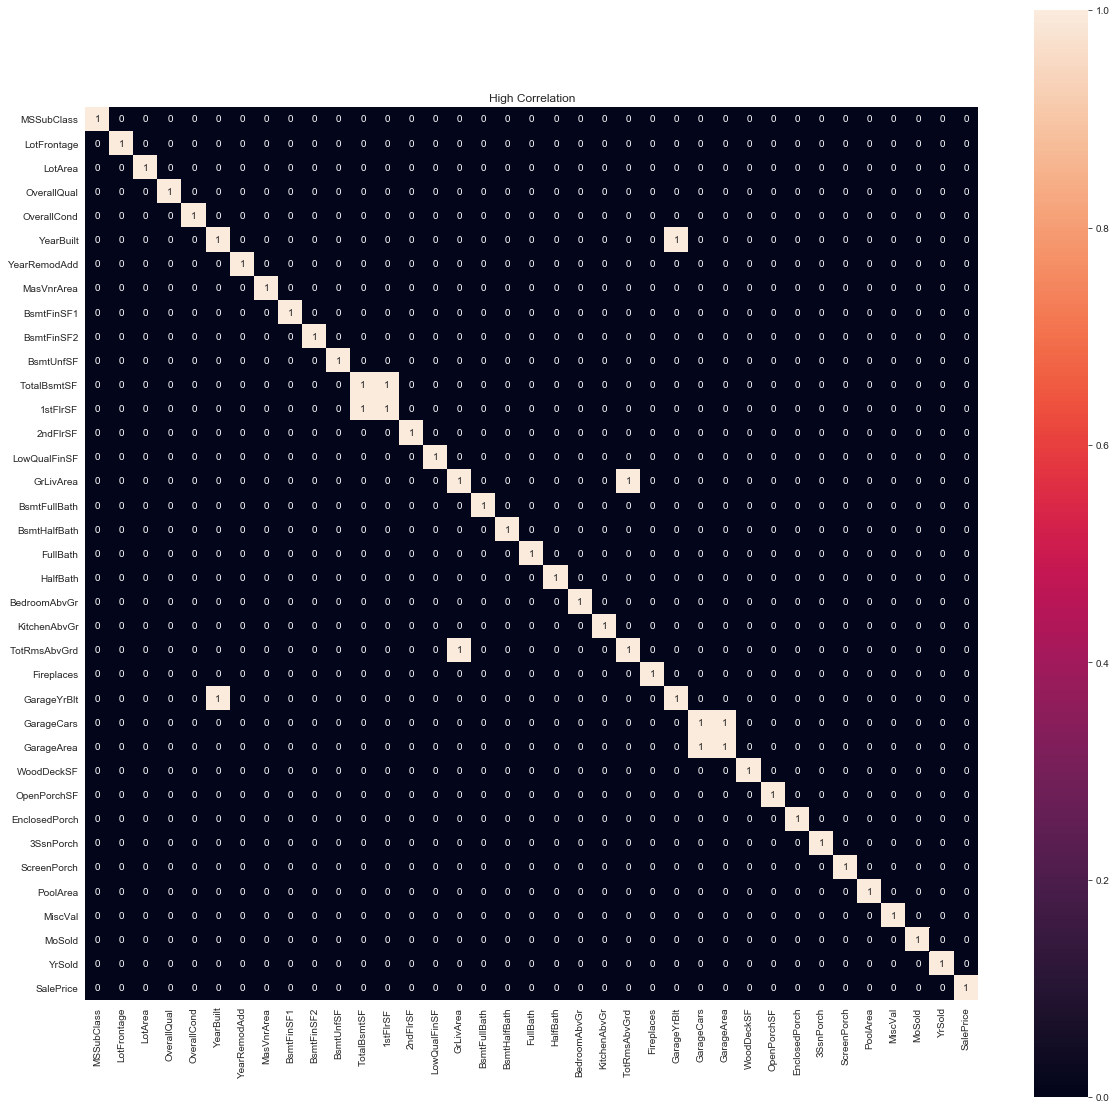

In [16]:
num_correlation = train_data.select_dtypes(exclude='object').corr()
plt.figure(figsize=(20,20))
plt.title('High Correlation')
sns.heatmap(num_correlation > 0.8, annot=True, square=True)

The heatmap above displays a boolean table for every feature couple and puts `1` (True) if that couple has a correlation of 0.8 or higher. The points excluding the diagonal `1` are our main concern here.

According to this heatmap, highly correlated features are below:
- YearBuilt vs GarageYrBlt
- 1stFlrSF vs TotalBsmtSF
- GrLivArea vs TotRmsAbvGrd
- GarageCars vs GarageArea

And below list shows the correlation of every feature with `SalePrice`, the price of the houses.

In [17]:
corr = num_correlation.corr()
print(corr['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.957368
GarageCars       0.904585
GarageArea       0.897669
TotalBsmtSF      0.825906
1stFlrSF         0.805062
GrLivArea        0.800791
FullBath         0.799044
MasVnrArea       0.795108
YearBuilt        0.785410
YearRemodAdd     0.755665
GarageYrBlt      0.753504
Fireplaces       0.720128
TotRmsAbvGrd     0.623028
LotFrontage      0.605839
OpenPorchSF      0.592191
WoodDeckSF       0.569842
LotArea          0.534966
BsmtFinSF1       0.499652
BsmtUnfSF        0.444518
HalfBath         0.391875
BsmtFullBath     0.272316
2ndFlrSF         0.256162
BedroomAbvGr     0.179484
ScreenPorch      0.014134
PoolArea        -0.016212
MoSold          -0.024352
3SsnPorch       -0.044218
YrSold          -0.220889
BsmtFinSF2      -0.225291
BsmtHalfBath    -0.239809
LowQualFinSF    -0.261396
MSSubClass      -0.279430
MiscVal         -0.349252
KitchenAbvGr    -0.369341
OverallCond     -0.478252
EnclosedPorch   -0.481796
Name: SalePrice, dtype: float64


Now we will remove one of the highly correlated feature couples:

In [18]:
train_data.drop(columns=['GarageArea','TotRmsAbvGrd','GarageYrBlt','1stFlrSF'],axis=1,inplace=True) 
test_data.drop(columns=['GarageArea','TotRmsAbvGrd','GarageYrBlt','1stFlrSF'],axis=1,inplace=True)

Let's see which features have the most missing values:

In [19]:
train_data.isnull().mean().sort_values(ascending=False).head(10)

PoolQC          0.996549
MiscFeature     0.965493
Alley           0.937888
Fence           0.806763
FireplaceQu     0.475500
LotFrontage     0.175293
GarageCond      0.055901
GarageType      0.055901
GarageFinish    0.055901
GarageQual      0.055901
dtype: float64

It is clear that the features `Alley`, `MiscFeature` and `PoolQC` are missing over 90% of their values. I decided to remove those features rather than filling them. Once we remove `PoolQC` feature, `PoolArea` becomes useless so we also drop this feature.

In [20]:
train_data.drop(columns=['Alley','MiscFeature','PoolQC','PoolArea'], axis=1, inplace=True)
test_data.drop(columns=['Alley','MiscFeature','PoolQC','PoolArea'], axis=1, inplace=True)

In [21]:
test_data.isnull().mean().sort_values(ascending=False).head(10)

Fence           0.801234
FireplaceQu     0.500343
LotFrontage     0.155586
GarageCond      0.053461
GarageQual      0.053461
GarageFinish    0.053461
GarageType      0.052090
BsmtCond        0.030843
BsmtQual        0.030158
BsmtExposure    0.030158
dtype: float64

Test data doesn't have any features that have over 90% of missing values. So we don't drop any features here.

### 4.3 Filling Numerical Missing Values

So far we filtered out the features with high missing values and high correlation. Now we will fill the missing values in features we have. Let's start with looking the percentage of missing values in each feature.


In [22]:
# Checking Train and Test data missing value percentage
null = pd.DataFrame(data={'Train Data Null Percentage': train_data.isnull().sum()[train_data.isnull().sum() > 0], 'Test Data Null Percentage': test_data.isnull().sum()[test_data.isnull().sum() > 0]})
null = round(((null/len(train_data)) * 100), 2)

null.index.name='Feature'
null

,Train Data Null Percentage,Test Data Null Percentage
Feature,,
BsmtCond,2.55,3.11
BsmtExposure,2.62,3.04
BsmtFinSF1,NaN,0.07
BsmtFinSF2,NaN,0.07
BsmtFinType1,2.55,2.90
BsmtFinType2,2.62,2.90
BsmtFullBath,NaN,0.14
BsmtHalfBath,NaN,0.14
BsmtQual,2.55,3.04


In [23]:
## Number of rows with missing values for each column
train_data.isnull().sum().sort_values(ascending=False)[:20]

Fence           1169
FireplaceQu      689
LotFrontage      254
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrType         8
MasVnrArea         8
Electrical         1
YearBuilt          0
Exterior2nd        0
ExterQual          0
ExterCond          0
Exterior1st        0
dtype: int64

In [24]:
##Filtering numerical features with missing value percentage

train_num_features = train_data.select_dtypes(exclude='object').isnull().mean()
test_num_features = test_data.select_dtypes(exclude='object').isnull().mean()

num_null_features = pd.DataFrame(data={'Missing Num in Train Data, Percentage: ': train_num_features[train_num_features > 0], 
                                       'Missing Num in Test Data, Percentage: ': test_num_features[test_num_features > 0]
                                      })

num_null_features.index.name = 'Numerical Features'
num_null_features

,"Missing Num in Train Data, Percentage:","Missing Num in Test Data, Percentage:"
Numerical Features,,
BsmtFinSF1,NaN,0.000685
BsmtFinSF2,NaN,0.000685
BsmtFullBath,NaN,0.001371
BsmtHalfBath,NaN,0.001371
BsmtUnfSF,NaN,0.000685
GarageCars,NaN,0.000685
LotFrontage,0.175293,0.155586
MasVnrArea,0.005521,0.010281
TotalBsmtSF,NaN,0.000685


In [25]:
## Fill missing values in numerical features with "0", excluding 'LotFrontage'
for df in [train_data, test_data]:
    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 
                'GarageCars', 'LowQualFinSF', 'GrLivArea', 'MasVnrArea', 'TotalBsmtSF'):
                    df[col] = df[col].fillna(0)

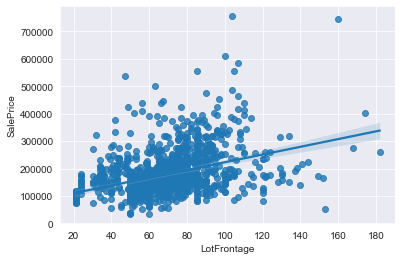

In [26]:
_=sns.regplot(train_data['LotFrontage'],train_data['SalePrice'])

In [27]:
train_num_features = train_data.select_dtypes(exclude='object').isnull().mean()
test_num_features = test_data.select_dtypes(exclude='object').isnull().mean()

num_null_features = pd.DataFrame(data={'Missing Num in Train Data, Percentage: ': train_num_features[train_num_features > 0], 
                                       'Missing Num in Test Data, Percentage: ': test_num_features[test_num_features > 0]})
num_null_features.index.name = 'Numerical Features'
num_null_features

,"Missing Num in Train Data, Percentage:","Missing Num in Test Data, Percentage:"
Numerical Features,,
LotFrontage,0.175293,0.155586


We will fill missing 'LotFrontage' values by considering Neighborhood information. Let's use median of the values accordingly.

In [28]:
train_data['LotFrontage'] = train_data.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.median()))
test_data['LotFrontage'] = test_data.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.median()))

### 4.4 Filling Categorical Missing Values

Let's examine categorical features of these datasets.

In [29]:
## Identifying categorical features
cat_col = train_data.select_dtypes(include='object').columns
print(cat_col)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')


In [30]:
##Filtering categorical features with missing value percentage
train_cat_features = train_data.select_dtypes(include='object').isnull().mean()
test_cat_features = test_data.select_dtypes(include='object').isnull().mean()

cat_null_features = pd.DataFrame(data={'Missing Cat in Train Data, Percentage: ': train_cat_features[train_cat_features > 0], 
                                       'Missing Cat in Test Data, Percentage: ': test_cat_features[test_cat_features > 0]})
cat_null_features.index.name = 'Categorical Features'
cat_null_features

,"Missing Cat in Train Data, Percentage:","Missing Cat in Test Data, Percentage:"
Categorical Features,,
BsmtCond,0.025535,0.030843
BsmtExposure,0.026225,0.030158
BsmtFinType1,0.025535,0.028787
BsmtFinType2,0.026225,0.028787
BsmtQual,0.025535,0.030158
Electrical,0.000690,NaN
Exterior1st,NaN,0.000685
Exterior2nd,NaN,0.000685
Fence,0.806763,0.801234


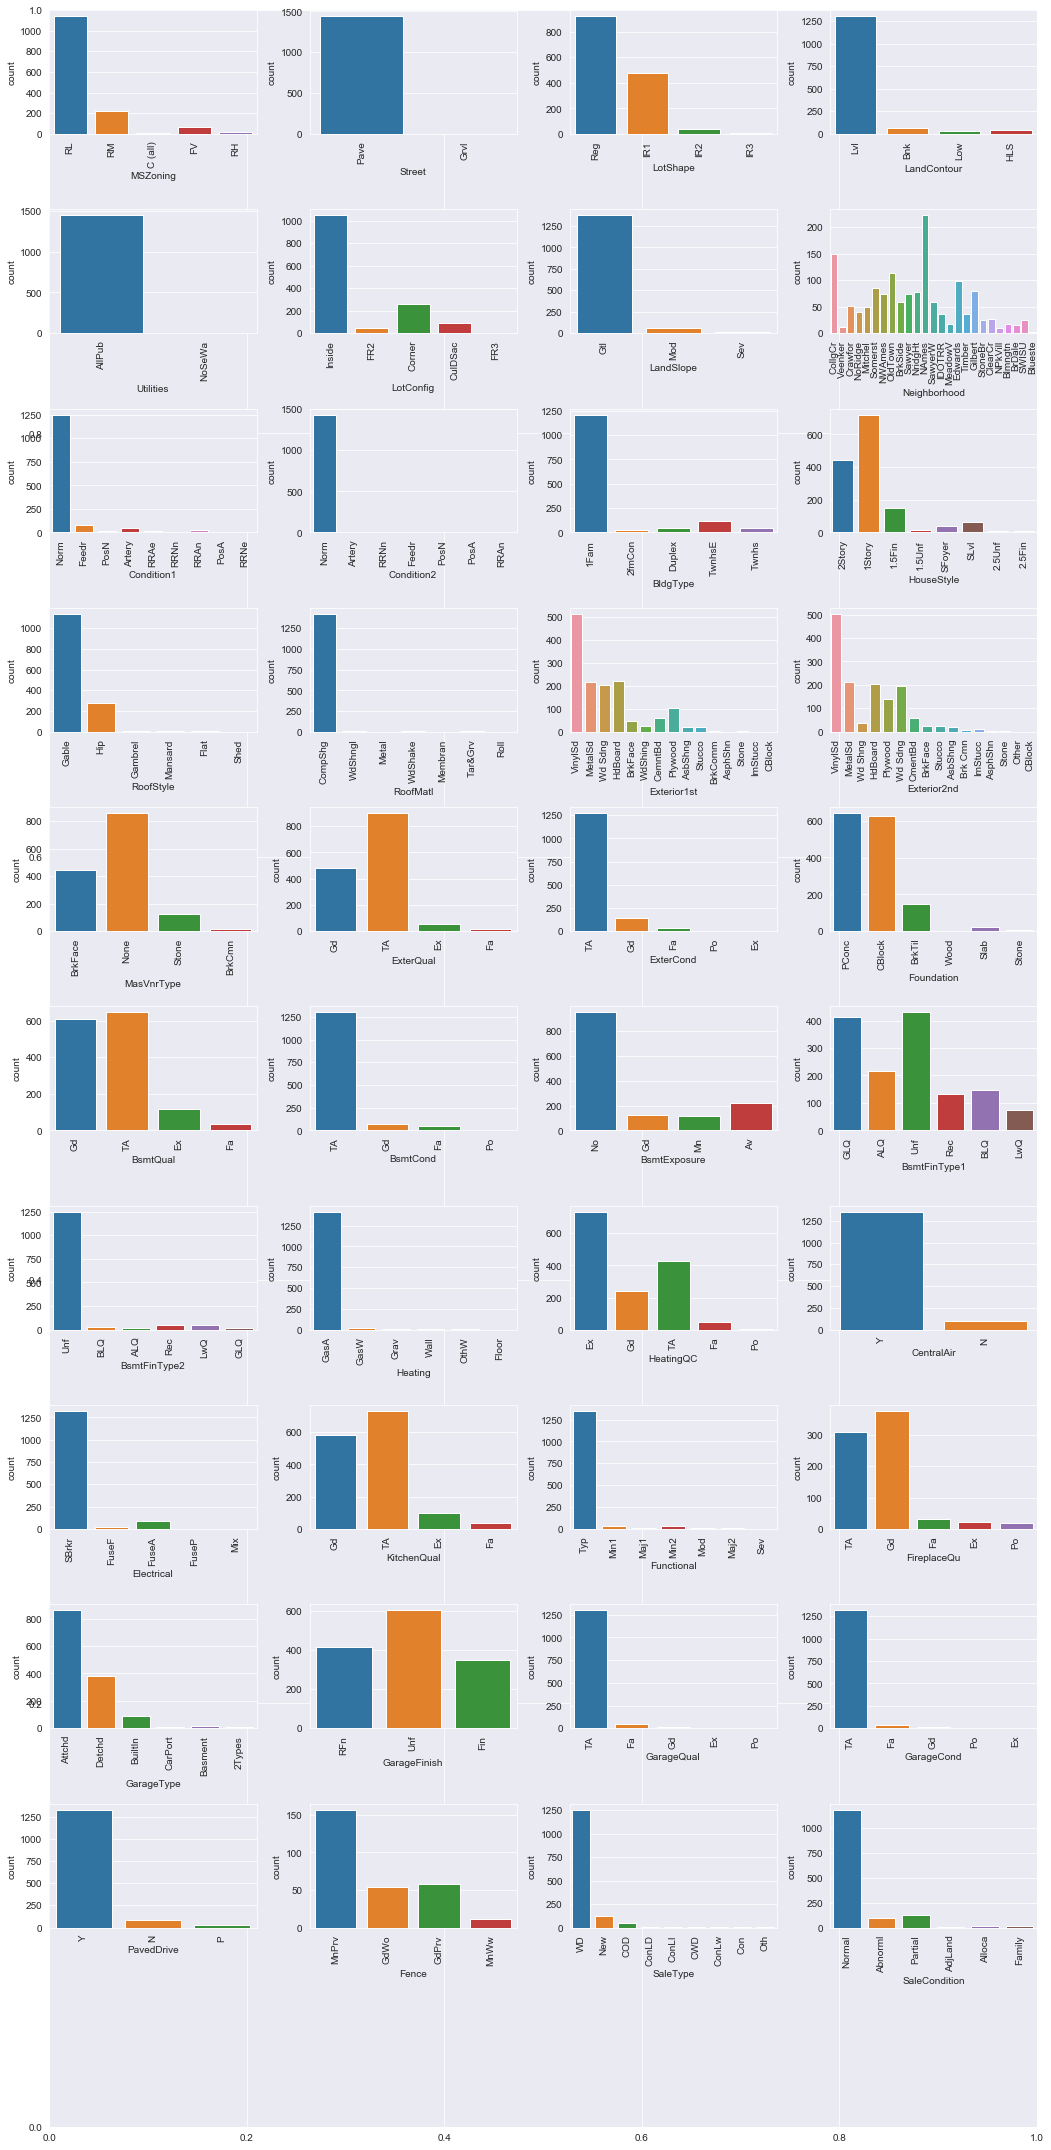

In [31]:
## Visualize every categorical feature with their values

cat_col = train_data.select_dtypes(include='object').columns

columns = len(cat_col)/4+1

fg, ax = plt.subplots(figsize=(15, 30))

for i, col in enumerate(cat_col):
    fg.add_subplot(columns, 4, i+1)
    sns.countplot(train_data[col])
    plt.xlabel(col)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

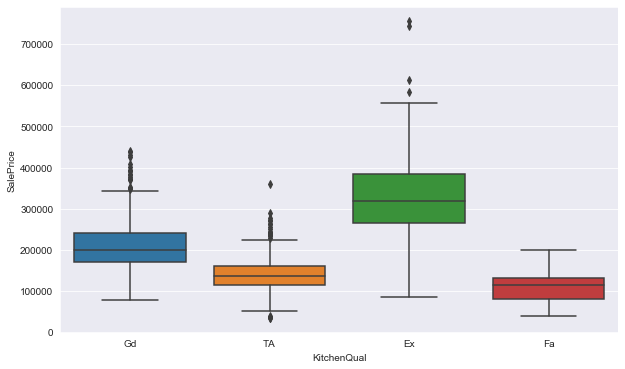

In [32]:
## Visualize 'KitchenQual' and 'SalePrice' relationship in boxplot
var = train_data['KitchenQual']
f, ax = plt.subplots(figsize=(10,6))
sns.boxplot(y=train_data.SalePrice, x=var)
plt.show()

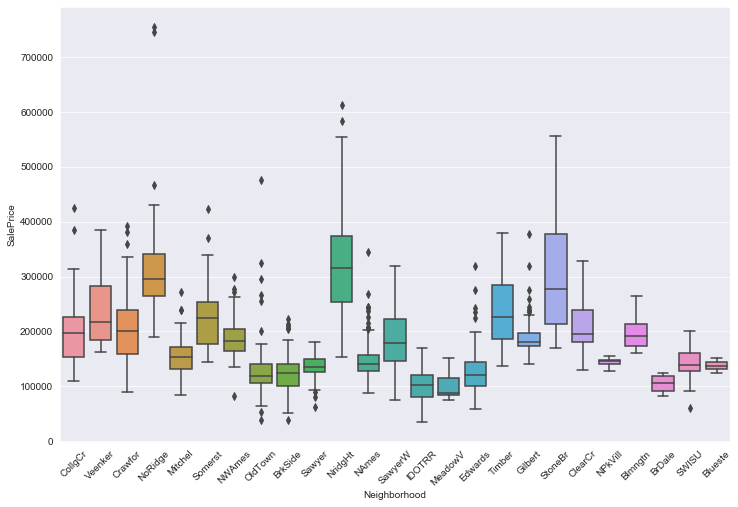

In [33]:
## Visualize Neighborhood effect on SalePrice

f, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y=train_data.SalePrice, x=train_data.Neighborhood)
plt.xticks(rotation=45)
plt.show()

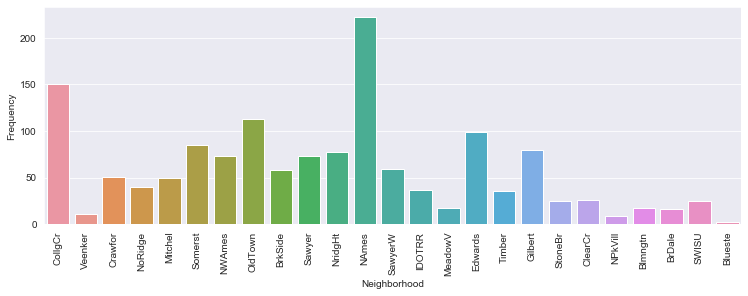

In [34]:
## Count of categories within Neighborhood attribute
fig = plt.figure(figsize=(12.5,4))
sns.countplot(x='Neighborhood', data=train_data)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

In [35]:
train_data.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [36]:
train_cat_features = train_data.select_dtypes(include='object').isnull().mean()
test_cat_features = test_data.select_dtypes(include='object').isnull().mean()

cat_null_features = pd.DataFrame(data={'Missing Cat Train Data Percentage': train_cat_features[train_cat_features > 0], 
                                       'Missing Cat Test Data Percentage': test_cat_features[test_cat_features > 0]})
cat_null_features.index.name = 'Categorical Features'
cat_null_features.sort_values('Missing Cat Train Data Percentage', ascending=False)

,Missing Cat Train Data Percentage,Missing Cat Test Data Percentage
Categorical Features,,
Fence,0.806763,0.801234
FireplaceQu,0.475500,0.500343
GarageCond,0.055901,0.053461
GarageFinish,0.055901,0.053461
GarageQual,0.055901,0.053461
GarageType,0.055901,0.052090
BsmtExposure,0.026225,0.030158
BsmtFinType2,0.026225,0.028787
BsmtCond,0.025535,0.030843


In [37]:
cat_null_features.index

Index(['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual',
       'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu',
       'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'KitchenQual', 'MSZoning', 'MasVnrType', 'SaleType', 'Utilities'],
      dtype='object', name='Categorical Features')

In [38]:
# Fill null values in columns with missing values
for df in [train_data, test_data]:
    for col in ('BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual',
       'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu',
       'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'KitchenQual', 'MSZoning', 'MasVnrType', 'SaleType', 'Utilities'):
        df[col] = df[col].fillna('None')

In [39]:
train_cat_features = train_data.select_dtypes(include='object').isnull().mean()
test_cat_features = test_data.select_dtypes(include='object').isnull().mean()

cat_null_features = pd.DataFrame(data={'Missing Cat Train Data Percentage': train_cat_features[train_cat_features > 0], 
                                       'Missing Cat Test Data Percentage': test_cat_features[test_cat_features > 0]})
cat_null_features.index.name = 'Categorical Features'
cat_null_features.sort_values('Missing Cat Train Data Percentage', ascending=False)

,Missing Cat Train Data Percentage,Missing Cat Test Data Percentage
Categorical Features,,


There is no more missing values in categorical features.

## 5. Feature Engineering
In this section:

- 5.1 Creating extra features and changing types
- 5.2 SalePrice Distribution Visualization

### 5.1 Creating extra features and changing types

We create extra features in order to categorize data with and without a feature

For example:
- 'HasPool' is 1 if you have pool and 0 if you don't have a pool

In [40]:
train_data['Has2ndfloor'] = train_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train_data['HasBsmt'] = train_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train_data['HasFirePlace'] = train_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
train_data['Has2ndFlr'] = train_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train_data['HasBsmt'] = train_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

test_data['Has2ndfloor'] = test_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
test_data['HasBsmt'] = test_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
test_data['HasFirePlace'] = test_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
test_data['Has2ndFlr'] = test_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
test_data['HasBsmt'] = test_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

`MoSold` and `YrSold` columns are more intuitive if translated in categorical values rather than numerical values. So we will change the data types of these columns and later we will deal with them as categorical features.

`MSSubClass`, `OverallQual`, `OverallCond`, 
`HalfBath`, `BedroomAbvGr`, `KitchenAbvGr`, 
`Fireplaces`, `GarageCars`, `MoSold`, `YrSold` 

In [41]:
train_data['MoSold'] = train_data['MoSold'].apply(str)
train_data['YrSold'] = train_data['YrSold'].apply(str)
train_data['YrSold'] = train_data['YrSold'].apply(str)
train_data['YrSold'] = train_data['YrSold'].apply(str)
train_data['YrSold'] = train_data['YrSold'].apply(str)
train_data['YrSold'] = train_data['YrSold'].apply(str)


test_data['MoSold'] = test_data['MoSold'].apply(str)
test_data['YrSold'] = test_data['YrSold'].apply(str)
test_data['MoSold'] = test_data['MoSold'].apply(str)


In [57]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 1 to 1460
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1449 non-null   object 
 1   MSZoning       1449 non-null   object 
 2   LotFrontage    1449 non-null   float64
 3   LotArea        1449 non-null   int64  
 4   Street         1449 non-null   object 
 5   LotShape       1449 non-null   object 
 6   LandContour    1449 non-null   object 
 7   Utilities      1449 non-null   object 
 8   LotConfig      1449 non-null   object 
 9   LandSlope      1449 non-null   object 
 10  Neighborhood   1449 non-null   object 
 11  Condition1     1449 non-null   object 
 12  Condition2     1449 non-null   object 
 13  BldgType       1449 non-null   object 
 14  HouseStyle     1449 non-null   object 
 15  OverallQual    1449 non-null   object 
 16  OverallCond    1449 non-null   object 
 17  YearBuilt      1449 non-null   int64  
 18  YearRemo

In [56]:
for df in [train_data, test_data]:
    for col in ('MSSubClass', 'OverallQual', 'OverallCond',
                'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold'):
        df[col] = df[col].apply(str)

### 5.2 SalePrice Distribution Visualization

Skew of SalePrice: 1.8496865159274047


C:\Users\ylmza\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


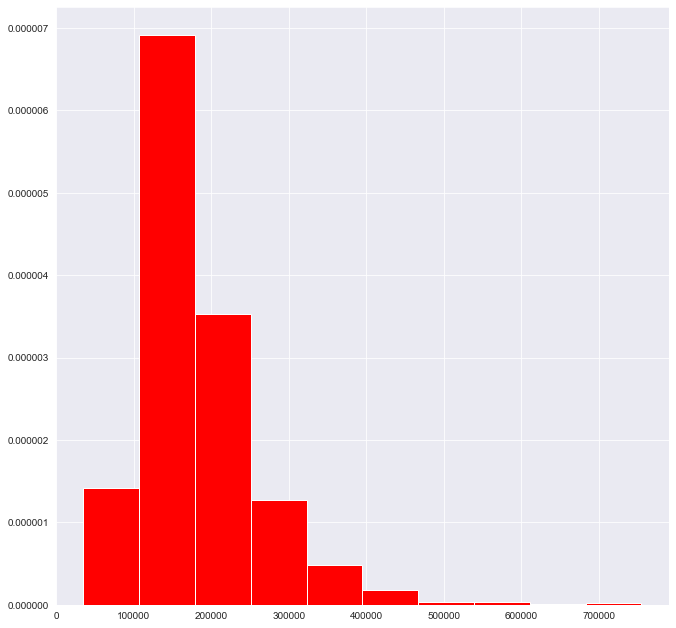

In [42]:
fig = plt.figure(figsize=(11,11))

print ("Skew of SalePrice:", train_data.SalePrice.skew())
plt.hist(train_data.SalePrice, normed=1, color='red')
plt.show()

The graph shows that SalePrice is skewed to the right and must be modified

Skew of Log-Transformed SalePrice: 0.11097465378779513


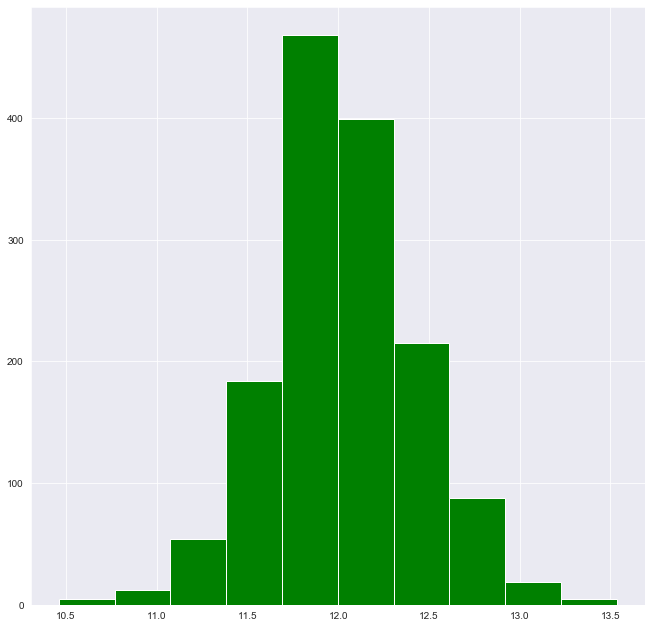

In [43]:
fig = plt.figure(figsize=(11,11))

print ("Skew of Log-Transformed SalePrice:", np.log1p(train_data.SalePrice).skew())
plt.hist(np.log1p(train_data.SalePrice), color='green')
plt.show()

As we can see the skew improved from approximately 1.85 to approximately 0.11 so we will log-transform SalePrice in the next section

## 6. Modelling

This is the final section in our project. Here we will drop the price column in training data and split our training data to train the model accordingly. Then we will examine multiple models to find best model fitting our approach. Last step will be using final model to predict house prices on test data.  

In this section:

- 6.1 Dealing with Data for Modelling
- 6.2 Finding the Best Model
- 6.3 Setting up Final Model for Submission

### 6.1 Dealing with Data for Modelling

As a reminder, the predictions will be evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. So we will log-transform the price values to align our model.

In [58]:
## Drop price column and arrange price values 
X = train_data.drop(['SalePrice'], axis=1)
y = np.log1p(train_data['SalePrice'])

In [59]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=123)

We select every numerical and categorical column from X.

In [60]:
categorical_cols = [cname for cname in X.columns if
                    X[cname].dtype == "object"] 
                


numerical_cols = [cname for cname in X.columns if
                 X[cname].dtype in ['int64','float64']]


my_cols = numerical_cols + categorical_cols

X_train = X_train[my_cols].copy()
X_valid = X_valid[my_cols].copy()
X_test = test_data[my_cols].copy()

Here we create a 'num_transformer' and a 'cat_transformer' for imputing and hot-encoding numerical and categorical features. We then store these transformers into a preprocessor column transformer.

In [61]:
num_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='constant'))
    ])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_cols),       
        ('cat',cat_transformer,categorical_cols),
        ])

### 6.2 Finding the Best Model

We test three models: 'XGBoost', 'Lasso', and 'Gradient' and see which one performs the best

In [62]:
# Reversing log-transform on y
def inv_y(transformed_y):
    return np.exp(transformed_y)

n_folds = 10

# XGBoost
model = XGBRegressor(learning_rate=0.1, n_estimators=1000, 
                     max_depth=3, min_child_weight=2, gamma=0, 
                     subsample=0.7, colsample_bytree=0.7,
                     objective='reg:squarederror', nthread=4,
                     scale_pos_weight=1, seed=11, reg_alpha=0.00006)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model)])
clf.fit(X_train, y_train)
predict = clf.predict(X_valid)
print('XGBoost: ' + str(mean_absolute_error(inv_y(predict), inv_y(y_valid))))

      
# Lasso   
model = LassoCV(max_iter=1e7,  random_state=123, cv=n_folds)
clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model)])
clf.fit(X_train, y_train)
predict = clf.predict(X_valid)
print('Lasso: ' + str(mean_absolute_error(inv_y(predict), inv_y(y_valid))))
  
      
# Gradient Boosting 
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=4, random_state=123)
clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model)])
clf.fit(X_train, y_train)
predict = clf.predict(X_valid)
print('Gradient: ' + str(mean_absolute_error(inv_y(predict), inv_y(y_valid))))


XGBoost: 16122.337015086207
Lasso: 25599.817300748367
Gradient: 17034.158766487126


As we can see XGBoost performed the best so we will be using this. 

In [63]:
model = XGBRegressor(learning_rate=0.01, n_estimators=3450, 
                     max_depth=3, min_child_weight=2, gamma=0, 
                     subsample=0.7, colsample_bytree=0.7,
                     objective='reg:squarederror', nthread=4,
                     scale_pos_weight=1, seed=11, reg_alpha=0.00006)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model)])


scores = cross_val_score(clf, X, y, scoring='neg_mean_squared_error', 
                         cv=n_folds)
gbr_mae_scores = -scores

print('Mean RMSE: ' + str(gbr_mae_scores.mean()))
print('Error std deviation: ' +str(gbr_mae_scores.std()))

Mean RMSE: 0.014743307010766099
Error std deviation: 0.006018873963429221


### 6.3 Setting up Final Model for Submission

We tried 3 different models and chose XGB for final model. Our next step is setting up the final model.

In [64]:
model = XGBRegressor(learning_rate=0.01, n_estimators=3450, 
                     max_depth=3, min_child_weight=2, gamma=0, 
                     subsample=0.7, colsample_bytree=0.7,
                     objective='reg:squarederror', nthread=4,
                     scale_pos_weight=1, seed=11, reg_alpha=0.00006)

final_model = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model)])

final_model.fit(X_train, y_train)

final_predictions = final_model.predict(X_test)

## 7. Submission

This part is for creating submission file to use in the competition.

In [65]:
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': inv_y(final_predictions)})

output.to_csv('submission.csv', index=False)